In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/asefjamilajwad/car-crash-dataset-ccd")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: syedosamaalishah
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/asefjamilajwad/car-crash-dataset-ccd


100%|██████████| 7.61G/7.61G [07:19<00:00, 18.6MB/s]


In [3]:
!nvidia-smi

Mon Jul  8 15:47:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   39C    P8              12W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [5]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [6]:
!pip install imageio opencv-python pandas

In [7]:
import os
import cv2
import time
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sys
import imageio
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [8]:
BASE_PATH = "/content/car-crash-dataset-ccd/"

TABLENAME = "/content/car-crash-dataset-ccd/Crash_Table.csv"

df = pd.read_csv(TABLENAME)
arr = []

for ind in df.index:
    for i in range(1, 51):
        arr.append(df[f"frame_{i}"][ind])

print(len(arr))
dataset = keras.preprocessing.image_dataset_from_directory(BASE_PATH, labels=arr, batch_size=128, label_mode='int')
print(df.columns)

75000
Found 75000 files belonging to 2 classes.
Index(['vidname', 'frame_1', 'frame_2', 'frame_3', 'frame_4', 'frame_5',
       'frame_6', 'frame_7', 'frame_8', 'frame_9', 'frame_10', 'frame_11',
       'frame_12', 'frame_13', 'frame_14', 'frame_15', 'frame_16', 'frame_17',
       'frame_18', 'frame_19', 'frame_20', 'frame_21', 'frame_22', 'frame_23',
       'frame_24', 'frame_25', 'frame_26', 'frame_27', 'frame_28', 'frame_29',
       'frame_30', 'frame_31', 'frame_32', 'frame_33', 'frame_34', 'frame_35',
       'frame_36', 'frame_37', 'frame_38', 'frame_39', 'frame_40', 'frame_41',
       'frame_42', 'frame_43', 'frame_44', 'frame_45', 'frame_46', 'frame_47',
       'frame_48', 'frame_49', 'frame_50', 'startframe', 'youtubeID', 'timing',
       'weather', 'egoinvolve'],
      dtype='object')


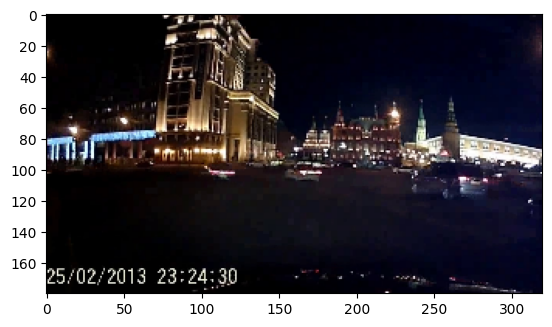

In [9]:
FILENAME = "/C_000051_"
FRAME = "12"
SCALE = 4

img = cv2.imread(BASE_PATH + "CrashBest/" + FILENAME + FRAME + ".jpg")
plt.imshow(img[::SCALE,::SCALE,::-1])

In [10]:
dataset = dataset.map(lambda x, y: (x / 255.0, y))

In [11]:
train_size = int(len(dataset) * 0.8)
train_ds = dataset.take(train_size)
test_ds = dataset.skip(train_size)

tf.Tensor(0, shape=(), dtype=int32)


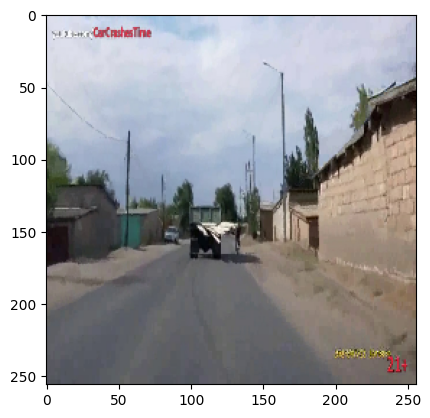

In [12]:
for t in train_ds.take(1):
    plt.imshow(t[0][0])
    print(t[1][0])

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, Model

def MobileNetV2(input_shape=(256, 256, 3), num_classes=1):
    inputs = tf.keras.Input(shape=input_shape)

    # MobileNetV2 backbone
    backbone = tf.keras.applications.MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')(inputs)

    # Add custom head for classification
    x = layers.GlobalAveragePooling2D()(backbone)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs, name='MobileNetV2')
    return model

model = MobileNetV2()
model.summary()

9406464/9406464 [==============================] - 1s 0us/step
Model: "MobileNetV2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 8, 8, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                          

In [14]:
!nvidia-smi

Mon Jul  8 15:49:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   49C    P0              29W /  72W |    451MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import time
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the model checkpoint callback
checkpoint = ModelCheckpoint(
    filepath='best_model_iphim.keras',  # Save the model with the highest val accuracy
    monitor='val_binary_accuracy',      # Monitor the validation binary accuracy
    save_best_only=True,                # Save only the best model
    mode='max',                         # We want to maximize the validation accuracy
    verbose=1
)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

# Start measuring time

start_time = time.time()

# Fit the model with the checkpoint callback
history = model.fit(train_ds, epochs=50, verbose=1, validation_data=test_ds, callbacks=[checkpoint])

# Calculate the time taken for training
end_time = time.time()
training_time = end_time - start_time

# Calculate hours and minutes from training time
training_hours = int(training_time // 3600)
training_minutes = int((training_time % 3600) // 60)
training_seconds = int(training_time % 60)

# Find the highest validation accuracy
highest_val_acc = max(history.history['val_binary_accuracy'])

# Print the details
print(f"Time taken to train the neural network: {training_hours} hours, {training_minutes} minutes, {training_seconds} seconds")
print(f"Highest validation accuracy: {highest_val_acc:.4f}")
print("Model saved as best_model_iphim.keras")

Epoch 1/50
468/468 [==============================] - ETA: 0s - loss: 0.3875 - binary_accuracy: 0.8151
Epoch 1: val_binary_accuracy improved from -inf to 0.73887, saving model to best_model_iphim.keras
468/468 [==============================] - 291s 541ms/step - loss: 0.3875 - binary_accuracy: 0.8151 - val_loss: 4.2182 - val_binary_accuracy: 0.7389
Epoch 2/50
468/468 [==============================] - ETA: 0s - loss: 0.2743 - binary_accuracy: 0.8817
Epoch 2: val_binary_accuracy did not improve from 0.73887
468/468 [==============================] - 251s 535ms/step - loss: 0.2743 - binary_accuracy: 0.8817 - val_loss: 1.0786 - val_binary_accuracy: 0.6605
Epoch 3/50
468/468 [==============================] - ETA: 0s - loss: 0.2016 - binary_accuracy: 0.9193
Epoch 3: val_binary_accuracy did not improve from 0.73887
468/468 [==============================] - 251s 534ms/step - loss: 0.2016 - binary_accuracy: 0.9193 - val_loss: 1.1778 - val_binary_accuracy: 0.5841
Epoch 4/50
468/468 [=========

In [ ]:
def plot_accuracy(history):
    plt.plot(history.history['binary_accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_binary_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    plt.savefig("Model_Accuracy.png")

def plot_loss(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    plt.savefig("Model_Loss.png")

plot_accuracy(history)
plot_loss(history)